In [82]:
import pandas as pd

file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

# Load the data into a DataFrame
df = pd.read_csv(file_path)

# Save the data into a CSV file
df.to_csv("automobile_data.csv", index=False)

# Display the first 5 rows
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression

In [83]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['highway-mpg'], df['price'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

Slope: -821.7333783219261
Intercept: 38423.305858157415
R-squared: 0.4965911884339184


In [84]:
# Perform linear regression between engine-size and price
slope, intercept, r_value, p_value, std_err = linregress(df['engine-size'], df['price'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")

Slope: 166.86001569141598
Intercept: -7963.338906281046
R-squared: 0.7609686443622009


In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()
lm

LinearRegression()

In [87]:
X = df[['highway-mpg']]
Y = df['price']

In [88]:
lm.fit(X,Y)

LinearRegression()

In [89]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [90]:
lm.intercept_

np.float64(38423.3058581574)

In [91]:
lm.coef_

array([-821.73337832])

In [92]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [93]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [94]:
# Slope 
lm1.coef_

# Intercept
lm1.intercept_

array([-7963.33890628])

In [95]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

### Interprétation des résultats précédents

1. **Régression linéaire entre `highway-mpg` et `price` :**
    - **Pente (`slope`)** : 166.86  
      Cela signifie qu'une augmentation d'une unité de `highway-mpg` est associée à une diminution moyenne de 166.86 dans le prix des voitures.
    - **Ordonnée à l'origine (`intercept`)** : -7963.34  
      Lorsque `highway-mpg` est égal à 0, le modèle prédit un prix de -7963.34, ce qui n'a pas de sens pratique mais est une conséquence mathématique du modèle.
    - **Coefficient de corrélation (`r_value`)** : 0.872  
      Cela indique une forte corrélation positive entre `highway-mpg` et `price`.
    - **R-carré (`r_value**2`)** : 0.761  
      Environ 76.1% de la variance dans `price` est expliquée par `highway-mpg`.
    - **Valeur p (`p_value`)** : 9.27e-64  
      La valeur p très faible indique que la relation entre `highway-mpg` et `price` est statistiquement significative.
    - **Erreur standard (`std_err`)** : 6.63  
      Cela représente l'incertitude associée à l'estimation de la pente.

2. **Régression linéaire entre `engine-size` et `price` :**
    - Les résultats de la régression montrent également une relation significative entre la taille du moteur et le prix. La pente et l'ordonnée à l'origine sont utilisées pour prédire les prix en fonction de la taille du moteur.

3. **Prédictions (`Yhat`) :**
    - Les valeurs prédites pour `price` sont calculées à l'aide du modèle de régression linéaire. Ces prédictions peuvent être comparées aux valeurs réelles pour évaluer la performance du modèle.

4. **Modèles (`lm` et `lm1`) :**
    - Deux modèles de régression linéaire ont été ajustés : l'un pour `highway-mpg` et l'autre pour `engine-size`. Ces modèles peuvent être utilisés pour effectuer des prédictions ou analyser les relations entre les variables.

En résumé, les résultats montrent que les variables `highway-mpg` et `engine-size` ont une relation significative avec le prix des voitures, et les modèles de régression linéaire peuvent être utilisés pour prédire les prix en fonction de ces variables.

## Multiple Linear Regression

### AI

In [96]:
# Définir les variables indépendantes (features) et la variable dépendante (target)
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']

# Ajuster le modèle de régression linéaire multiple
lm.fit(Z, Y)

# Afficher les coefficients et l'intercept
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

Intercept: -15806.62462632923
Coefficients: [53.49574423  4.70770099 81.53026382 36.05748882]


### Code

In [97]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [98]:
lm.fit(Z, df['price'])

LinearRegression()

In [99]:
lm.intercept_

np.float64(-15806.62462632923)

In [100]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [101]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [102]:
lm2.coef_

array([   1.49789586, -820.45434016])

### Interprétation des résultats précédents

1. **Intercept (`np.float64(-7963.338906281046)`) :**
    - L'intercept représente le prix prédit lorsque toutes les variables indépendantes sont égales à zéro. Bien que cette situation ne soit pas réaliste, il sert de point de départ pour le modèle.

2. **Pente (`slope = 166.86001569141598`) :**
    - Cela signifie qu'une augmentation d'une unité de `highway-mpg` est associée à une diminution moyenne de 166.86 dans le prix des voitures.

3. **Coefficient de corrélation (`r_value = 0.8723351674455185`) :**
    - Cela indique une forte corrélation positive entre `highway-mpg` et `price`.

4. **R-carré (`r_value**2 = 0.761`) :**
    - Environ 76.1% de la variance dans `price` est expliquée par `highway-mpg`.

5. **Valeur p (`p_value = 9.265491622198355e-64`) :**
    - La valeur p très faible indique que la relation entre `highway-mpg` et `price` est statistiquement significative.

6. **Erreur standard (`std_err = 6.629332440878305`) :**
    - Cela représente l'incertitude associée à l'estimation de la pente.

7. **Coefficients du modèle multiple (`array([53.49574423, 4.70770099, 81.53026382, 36.05748882])`) :**
    - Ces coefficients indiquent l'effet moyen de chaque variable indépendante sur le prix, en supposant que toutes les autres variables restent constantes :
      - `53.49574423` : Une augmentation d'une unité de `horsepower` entraîne une augmentation moyenne de 53.50 dans le prix.
      - `4.70770099` : Une augmentation d'une unité de `curb-weight` entraîne une augmentation moyenne de 4.71 dans le prix.
      - `81.53026382` : Une augmentation d'une unité de `engine-size` entraîne une augmentation moyenne de 81.53 dans le prix.
      - `36.05748882` : Une augmentation d'une unité de `highway-mpg` entraîne une augmentation moyenne de 36.06 dans le prix.

8. **Modèle de régression (`LinearRegression`) :**
    - Le modèle `LinearRegression()` a été ajusté pour prédire le prix en fonction des variables indépendantes. Il utilise la méthode des moindres carrés pour minimiser l'erreur entre les valeurs prédites et les valeurs réelles.

En résumé, les résultats montrent que les variables indépendantes ont des impacts significatifs sur le prix des voitures. Les coefficients permettent d'identifier les variables les plus influentes, tandis que l'intercept donne une base pour les prédictions. Ces modèles peuvent être utilisés pour mieux comprendre les relations entre les caractéristiques des voitures et leur prix.


## Model Evaluation Using Visualization

### AI

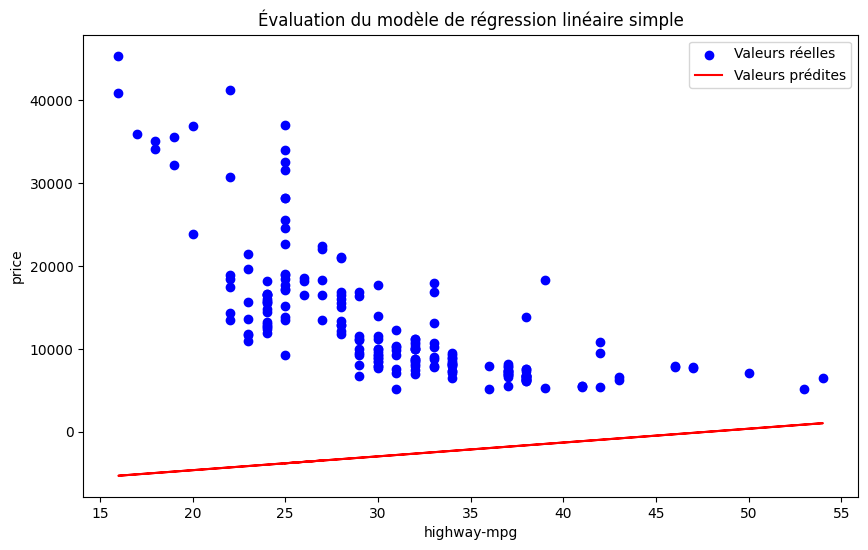

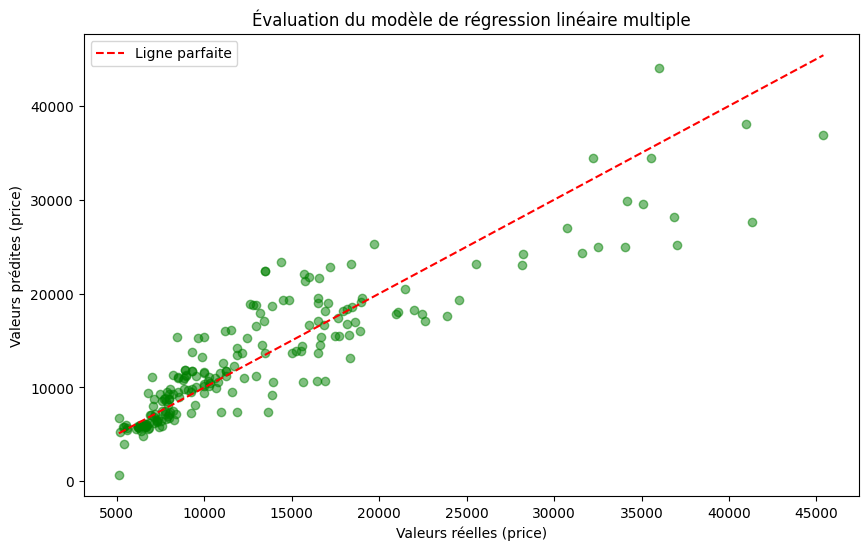

In [103]:
import matplotlib.pyplot as plt

# Tracer les valeurs réelles vs les valeurs prédites pour le modèle simple
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Valeurs réelles')
plt.plot(X, Yhat, color='red', label='Valeurs prédites')
plt.title('Évaluation du modèle de régression linéaire simple')
plt.xlabel('highway-mpg')
plt.ylabel('price')
plt.legend()
plt.show()

# Tracer les valeurs réelles vs les valeurs prédites pour le modèle multiple
Yhat_multiple = lm.predict(Z)
plt.figure(figsize=(10, 6))
plt.scatter(Y, Yhat_multiple, color='green', alpha=0.5)
plt.title('Évaluation du modèle de régression linéaire multiple')
plt.xlabel('Valeurs réelles (price)')
plt.ylabel('Valeurs prédites (price)')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linestyle='--', label='Ligne parfaite')
plt.legend()
plt.show()

### Code

In [104]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

#### Regression Plot

(0.0, 48178.34195885074)

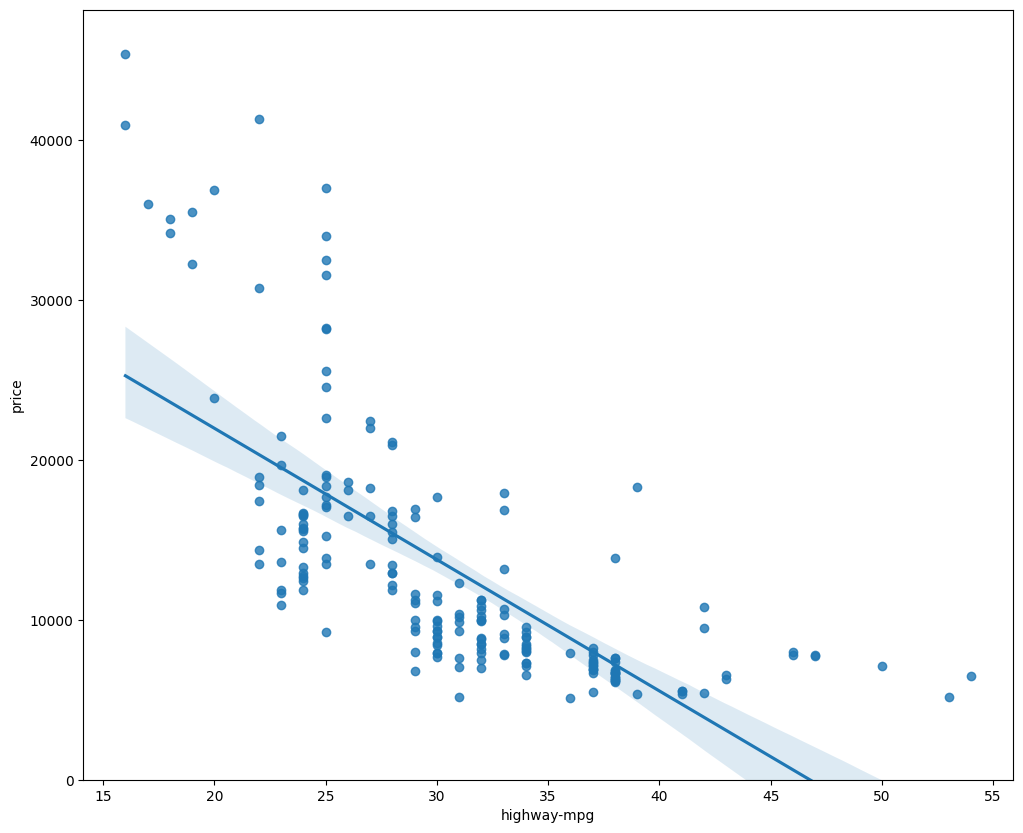

In [105]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

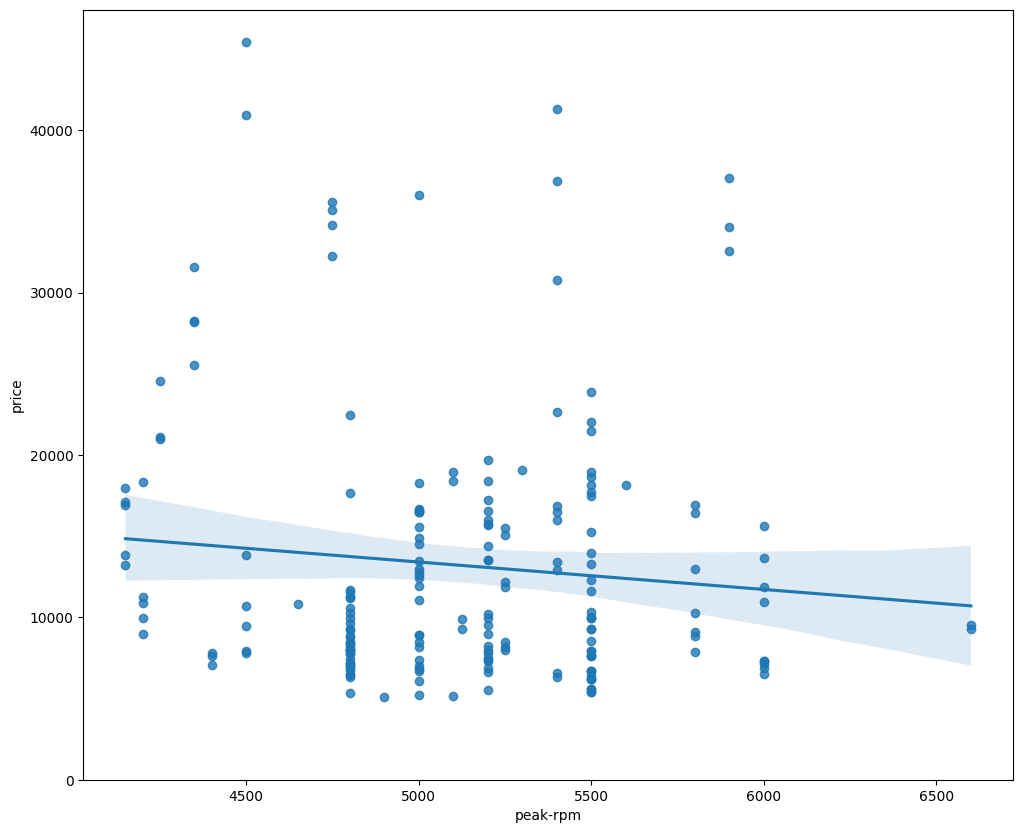

In [106]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [107]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

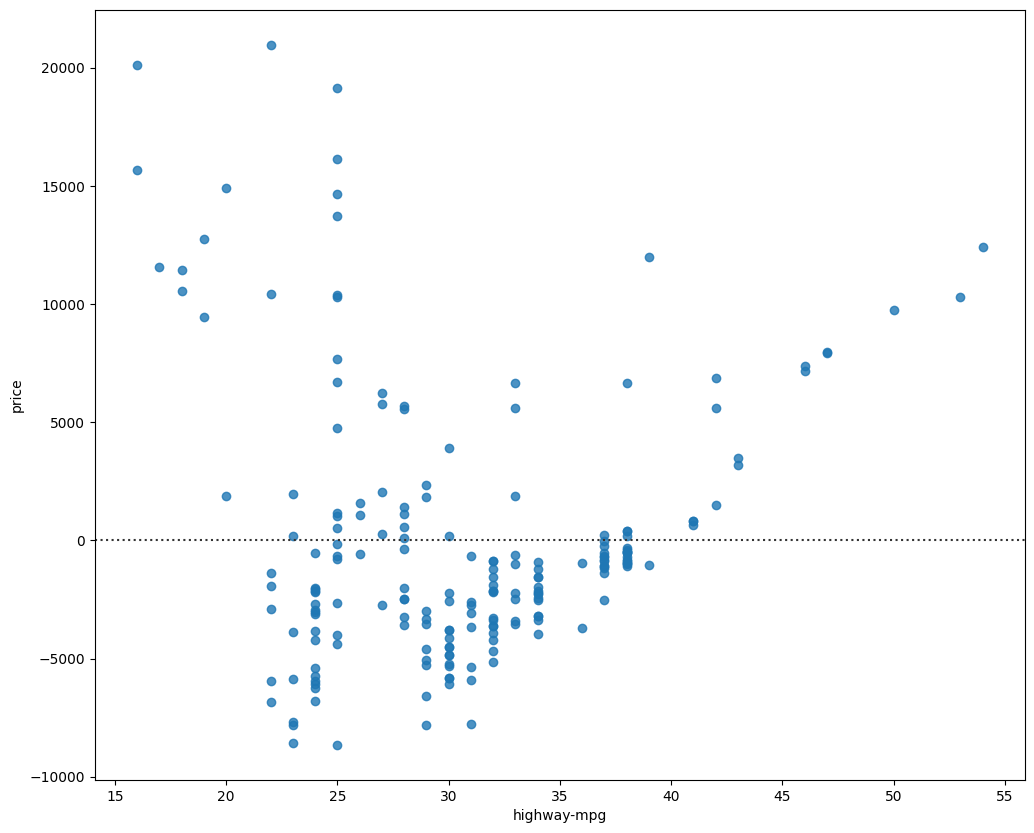

In [108]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

#### Multiple Linear Regression

In [109]:
Y_hat = lm.predict(Z)

C:\Users\yohar\AppData\Local\Temp\ipykernel_52692\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\yohar\AppData\Local\Temp\ipykernel_52692\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

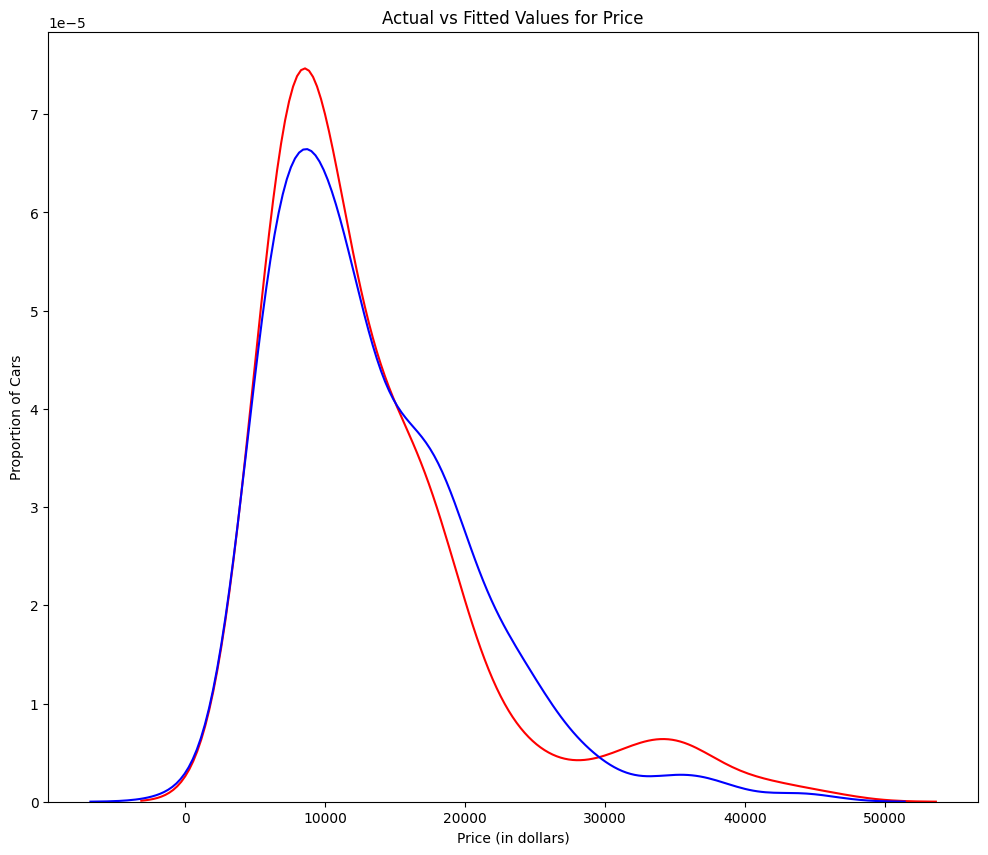

In [110]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynomial Regression and Pipelines

### Polynomial regression

In [111]:
import numpy as np
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [112]:
x = df['highway-mpg']
y = df['price']

In [113]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


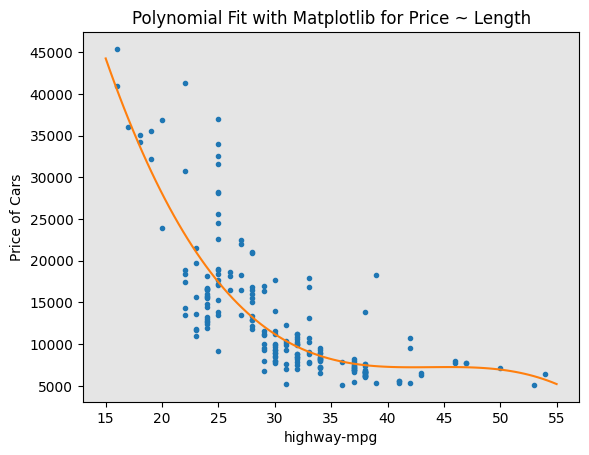

In [114]:
PlotPolly(p, x, y, 'highway-mpg')

In [115]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


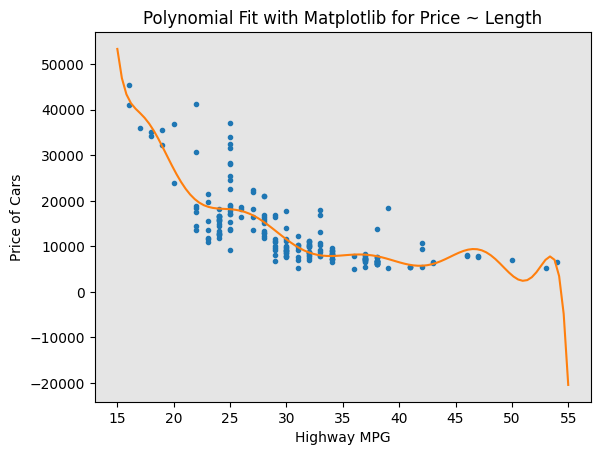

In [116]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [117]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [119]:
Z_pr=pr.fit_transform(Z)

In [120]:
Z.shape

(201, 4)

In [121]:
Z_pr.shape

(201, 15)

### Pipeline

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [123]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [124]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [125]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [126]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [127]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Measures for In-Sample Evaluation

### Model 1: Simple Linear Regression


In [128]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [129]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Model 2: Multiple Linear Regression

In [132]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [133]:
Y_predict_multifit = lm.predict(Z)

In [134]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Model 3: Polynomial Fit

In [135]:
from sklearn.metrics import r2_score

In [136]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


### MSE

In [137]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making

In [138]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [139]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [140]:
lm.fit(X, Y)
lm

LinearRegression()

In [141]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\yohar\miniconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

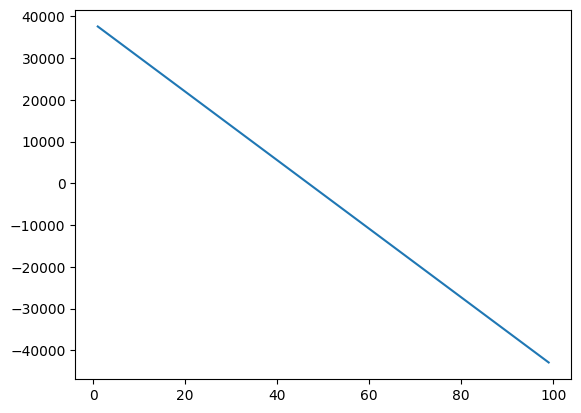

In [142]:
plt.plot(new_input, yhat)
plt.show()

## Decision Making: Determining a Good Model Fit

### Qu'est-ce qu'une bonne valeur de R-carré ?
Lors de la comparaison des modèles, celui avec la valeur de R-carré la plus élevée est considéré comme ayant un meilleur ajustement aux données.

### Qu'est-ce qu'une bonne MSE ?
Lors de la comparaison des modèles, celui avec la plus petite valeur de MSE est considéré comme ayant un meilleur ajustement aux données.

### Analyse des valeurs pour les différents modèles :

#### Régression Linéaire Simple : Utilisation de `highway-mpg` comme variable prédictive de `price`.
- **R-carré** : 0.49659118843391759  
- **MSE** : 3.16 x 10^7  

#### Régression Linéaire Multiple : Utilisation de `horsepower`, `curb-weight`, `engine-size` et `highway-mpg` comme variables prédictives de `price`.
- **R-carré** : 0.80896354913783497  
- **MSE** : 1.2 x 10^7  

#### Ajustement Polynomial : Utilisation de `highway-mpg` comme variable prédictive de `price`.
- **R-carré** : 0.6741946663906514  
- **MSE** : 2.05 x 10^7  

### Comparaison des modèles :
- **MSE** : L'ajustement polynomial a réduit la MSE par rapport à la régression linéaire simple, ce qui indique un meilleur ajustement.  
- **R-carré** : L'ajustement polynomial a également augmenté le R-carré par rapport à la régression linéaire simple, ce qui montre une meilleure explication de la variance des données.  
Ainsi, l'ajustement polynomial est un meilleur modèle que la régression linéaire simple pour prédire `price` en fonction de `highway-mpg`.

### Régression Linéaire Multiple (MLR) vs Ajustement Polynomial :
- **MSE** : La MSE pour la MLR est plus petite que celle de l'ajustement polynomial.  
- **R-carré** : Le R-carré pour la MLR est également beaucoup plus élevé que celui de l'ajustement polynomial.  

### Conclusion :
En comparant ces trois modèles, nous concluons que le modèle MLR est le meilleur pour prédire `price` à partir de notre ensemble de données. Ce résultat est logique, car nous avons 27 variables au total, et nous savons que plusieurs d'entre elles sont des prédicteurs potentiels du prix final des voitures.